In [2]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
categories = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
origin = my_read_excel('C:/Users/J/Desktop/Data_Science/Class/E.추론통계/E.InferentialStatistics/수업자료/telecom_customer.xlsx',categories=categories)
my_pretty_table(origin.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [8]:
origin.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
TotalCharges,7043,6531,,11
Churn,7043,2,No,5174


In [10]:
#origin.info()

origin['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [10]:
origin.dtypes   

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

In [15]:
df_num = origin.select_dtypes(['number']).columns
df_num

Index(['tenure', 'MonthlyCharges'], dtype='object')

## [2] 탐색적 데이터 분석 

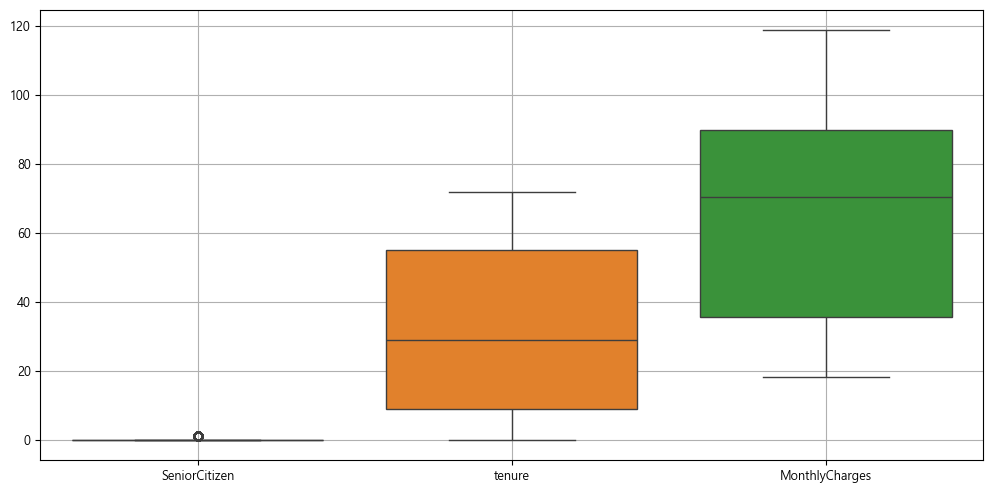

In [7]:
my_boxplot(origin)

In [ ]:
origin = origin.drop('customerID',axis=1)


In [78]:
origin.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

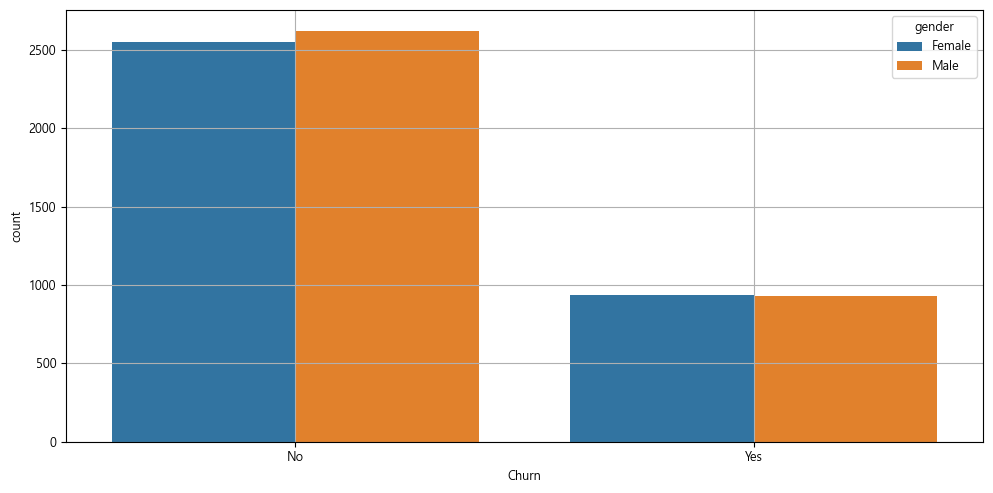

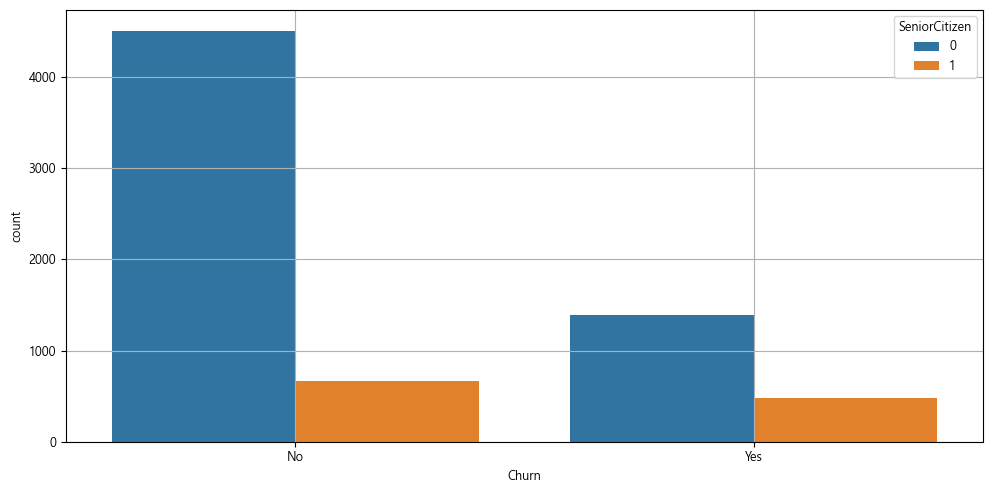

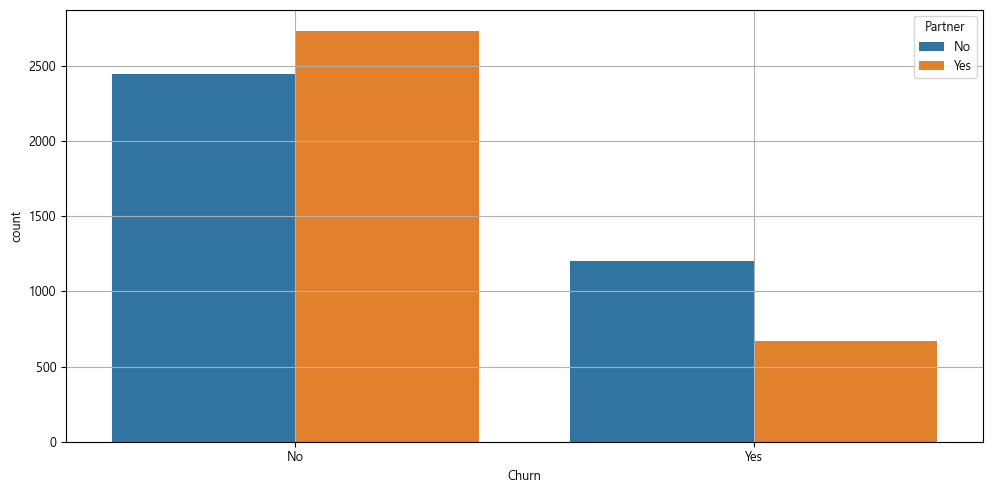

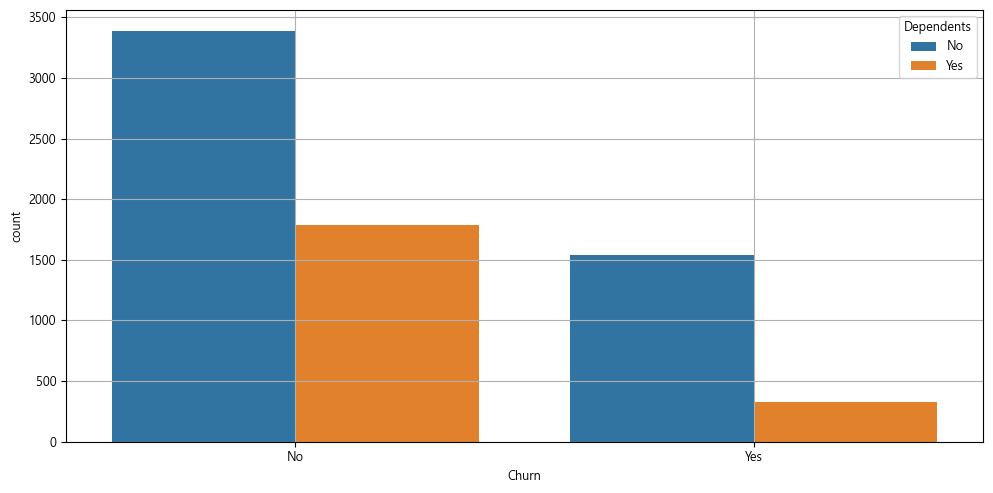

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

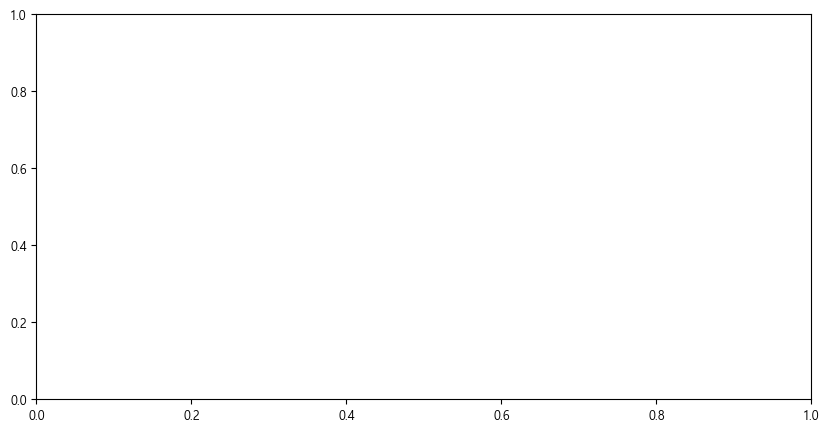

In [81]:
yname = 'Churn'
xnames = list(origin.drop(yname, axis=1).columns)
#print(xnames)
for i in xnames:
    #print(i)
    if origin[i].dtype == 'category':
        my_countplot(origin,xname=yname, hue=i,dpi=100)

    else:
        my_kdeplot(origin, xname=yname, hue=i, fill=True, dpi=100, callback=lambda ax: ax.set_title(i))

In [32]:
for f in origin.columns:
    vc = sorted(list(origin[f].unique()))
    #print(vc)
    label = {v: i for i, v in enumerate(vc)}
    print(label)
    #origin[f] = origin[f].map(label).astype('int')

{'0002-ORFBO': 0, '0003-MKNFE': 1, '0004-TLHLJ': 2, '0011-IGKFF': 3, '0013-EXCHZ': 4, '0013-MHZWF': 5, '0013-SMEOE': 6, '0014-BMAQU': 7, '0015-UOCOJ': 8, '0016-QLJIS': 9, '0017-DINOC': 10, '0017-IUDMW': 11, '0018-NYROU': 12, '0019-EFAEP': 13, '0019-GFNTW': 14, '0020-INWCK': 15, '0020-JDNXP': 16, '0021-IKXGC': 17, '0022-TCJCI': 18, '0023-HGHWL': 19, '0023-UYUPN': 20, '0023-XUOPT': 21, '0027-KWYKW': 22, '0030-FNXPP': 23, '0031-PVLZI': 24, '0032-PGELS': 25, '0036-IHMOT': 26, '0040-HALCW': 27, '0042-JVWOJ': 28, '0042-RLHYP': 29, '0048-LUMLS': 30, '0048-PIHNL': 31, '0052-DCKON': 32, '0052-YNYOT': 33, '0056-EPFBG': 34, '0057-QBUQH': 35, '0058-EVZWM': 36, '0060-FUALY': 37, '0064-SUDOG': 38, '0064-YIJGF': 39, '0067-DKWBL': 40, '0068-FIGTF': 41, '0071-NDAFP': 42, '0074-HDKDG': 43, '0076-LVEPS': 44, '0078-XZMHT': 45, '0080-EMYVY': 46, '0080-OROZO': 47, '0082-LDZUE': 48, '0082-OQIQY': 49, '0083-PIVIK': 50, '0089-IIQKO': 51, '0093-EXYQL': 52, '0093-XWZFY': 53, '0094-OIFMO': 54, '0096-BXERS': 55, '

In [46]:
#categories = 'gender',
categories = ['Churn','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
df = my_label(origin,categories).set_index('customerID')
my_pretty_table(df.head())

+--------------+----------+-----------------+-----------+--------------+----------+----------------+-----------------+-------------------+------------------+----------------+--------------------+---------------+---------------+-------------------+------------+--------------------+-----------------+------------------+----------------+---------+
| customerID   |   gender |   SeniorCitizen |   Partner |   Dependents |   tenure |   PhoneService |   MultipleLines |   InternetService |   OnlineSecurity |   OnlineBackup |   DeviceProtection |   TechSupport |   StreamingTV |   StreamingMovies |   Contract |   PaperlessBilling |   PaymentMethod |   MonthlyCharges |   TotalCharges |   Churn |
|--------------+----------+-----------------+-----------+--------------+----------+----------------+-----------------+-------------------+------------------+----------------+--------------------+---------------+---------------+-------------------+------------+--------------------+-----------------+---------

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null 

In [64]:
redf = origin.copy()

In [69]:
df2 = df.drop(df.query('TotalCharges == " "').index)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [70]:
# blank_df = origin.query('TotalCharges == " "')
# blank_df

blank_df = df2.query('TotalCharges == " "')
blank_df    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [ ]:
help()

In [71]:
df2['TotalCharges'] = df2['TotalCharges'].astype('float')

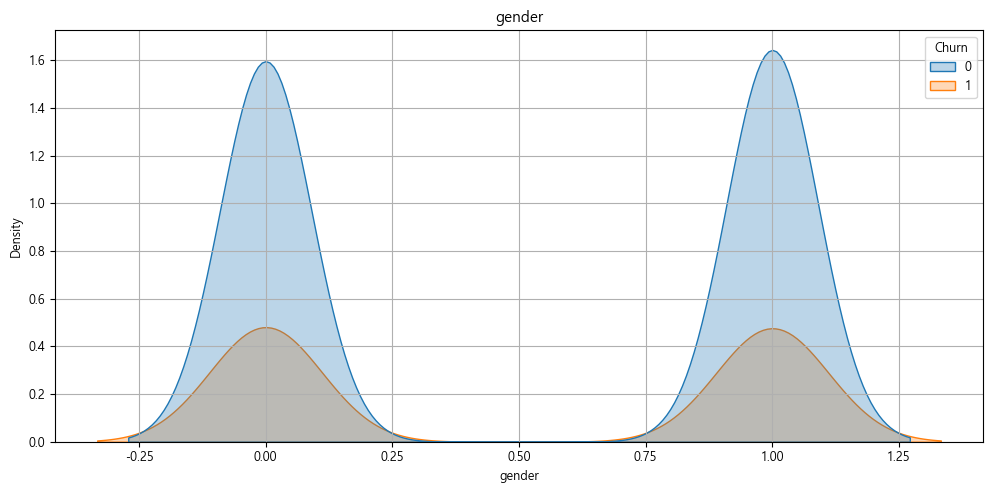

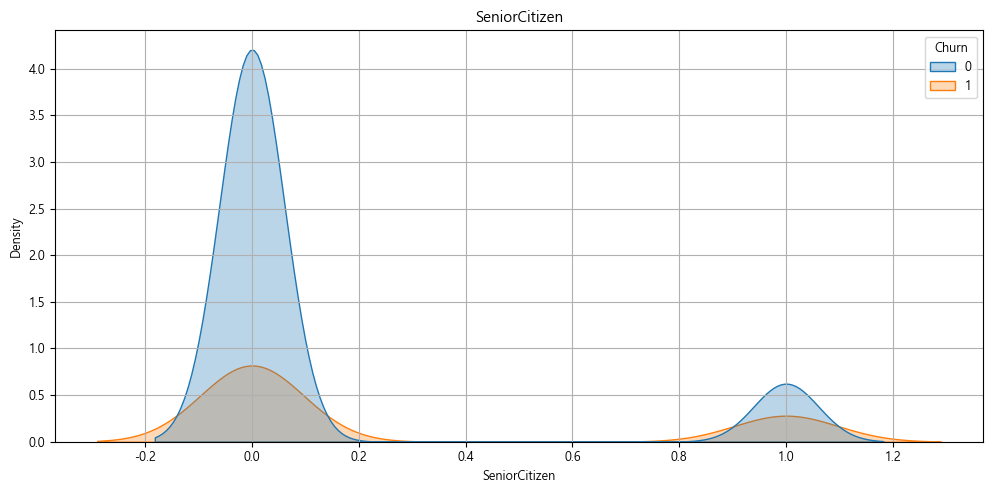

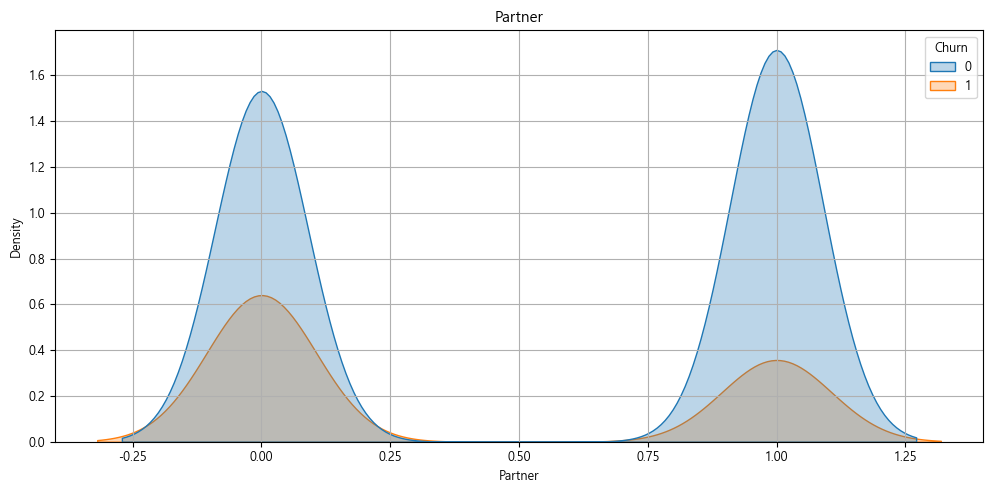

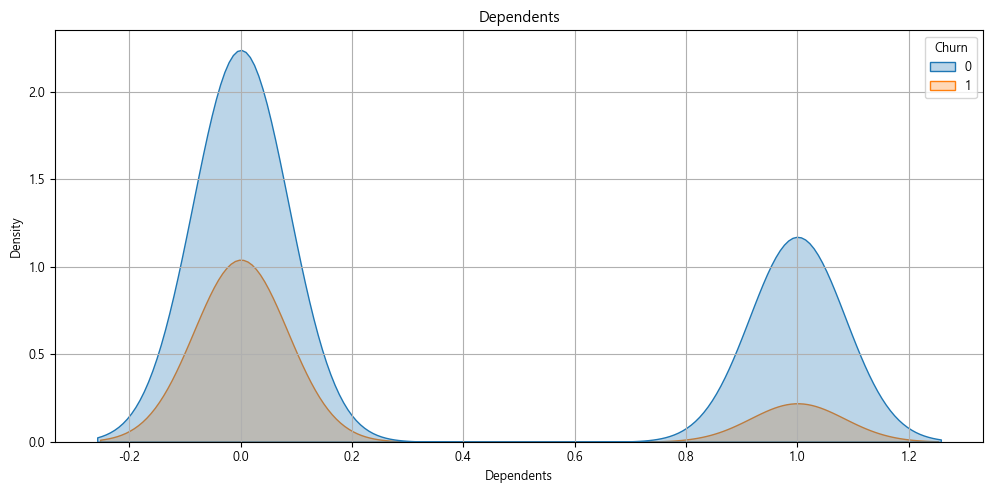

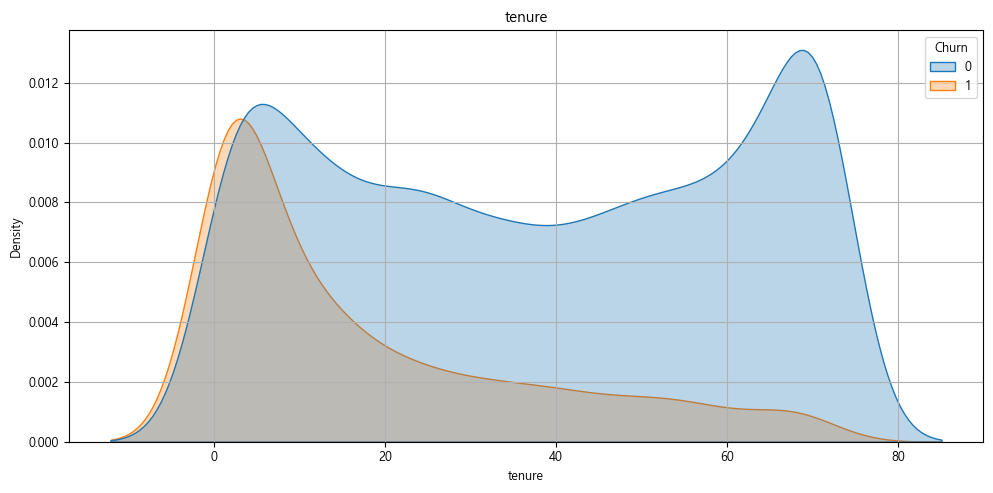

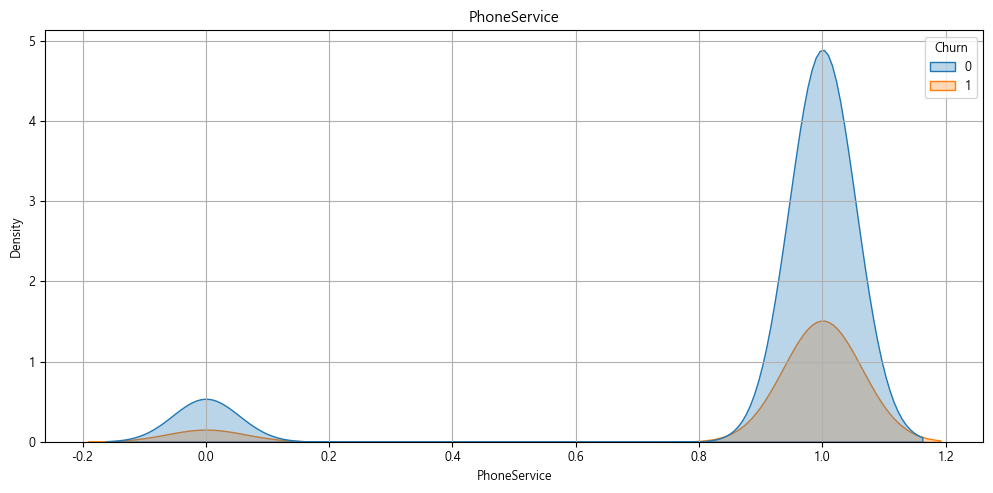

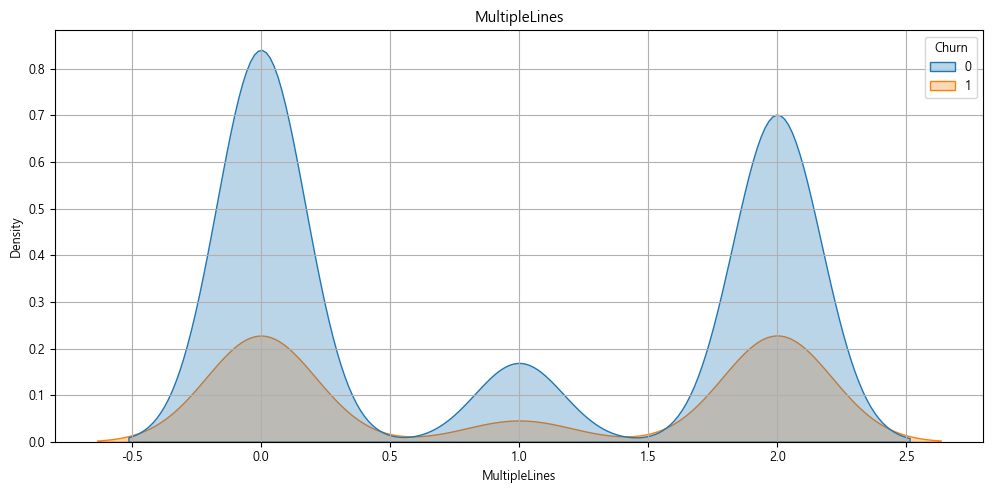

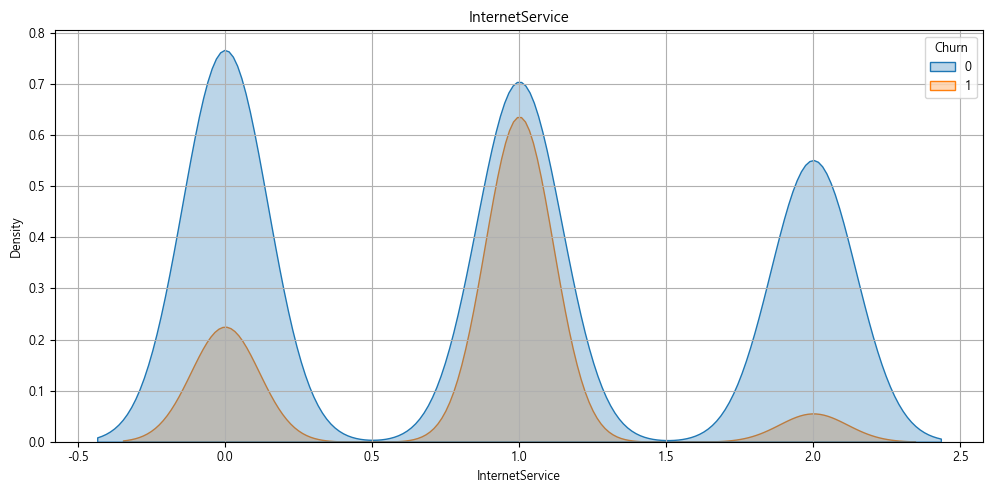

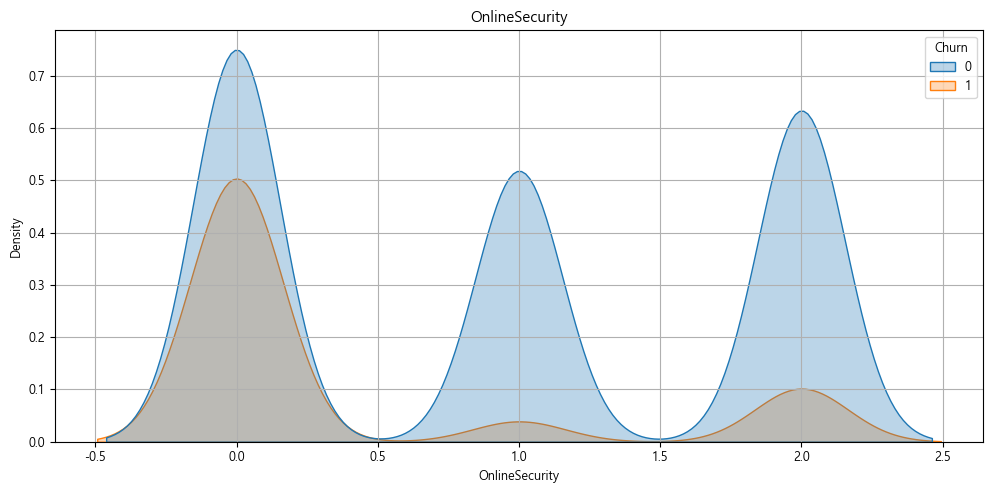

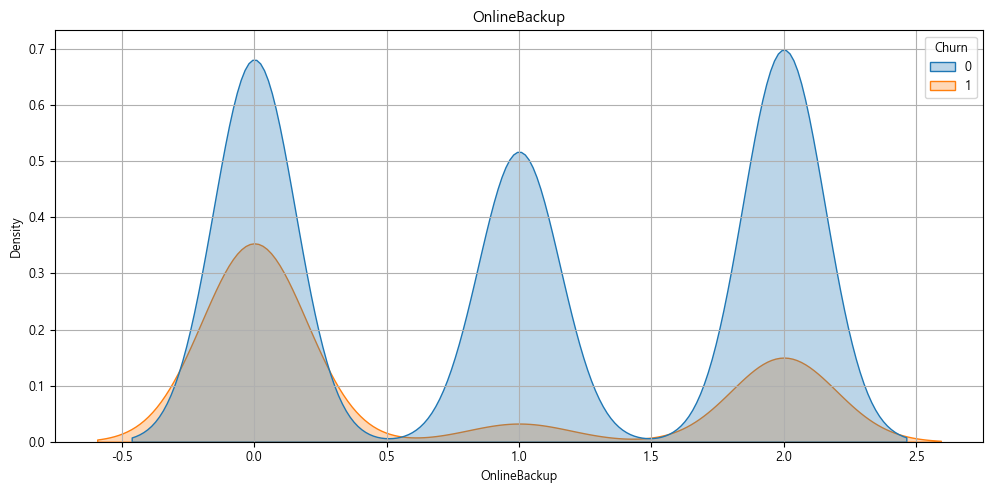

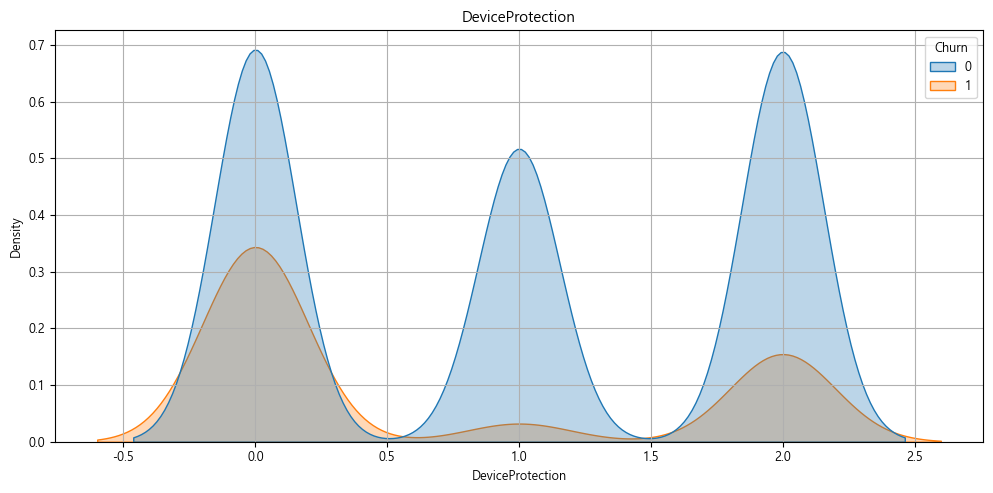

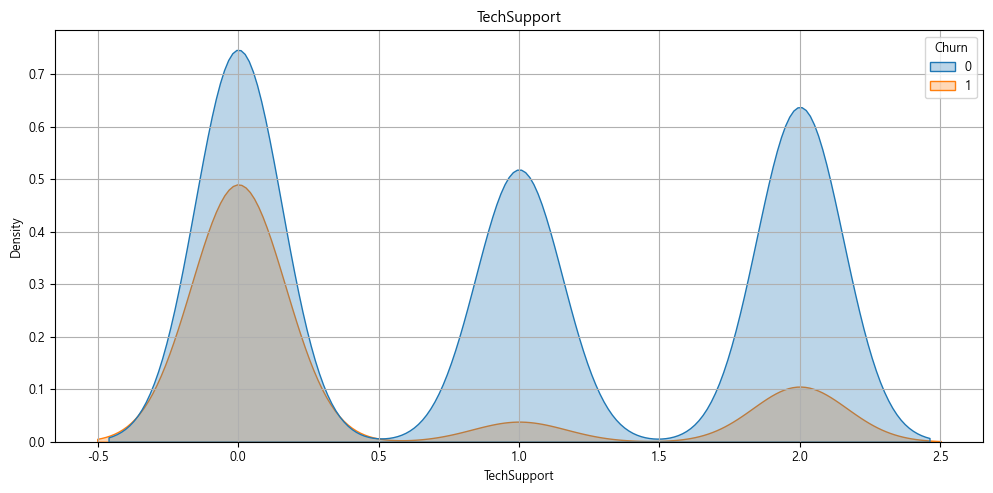

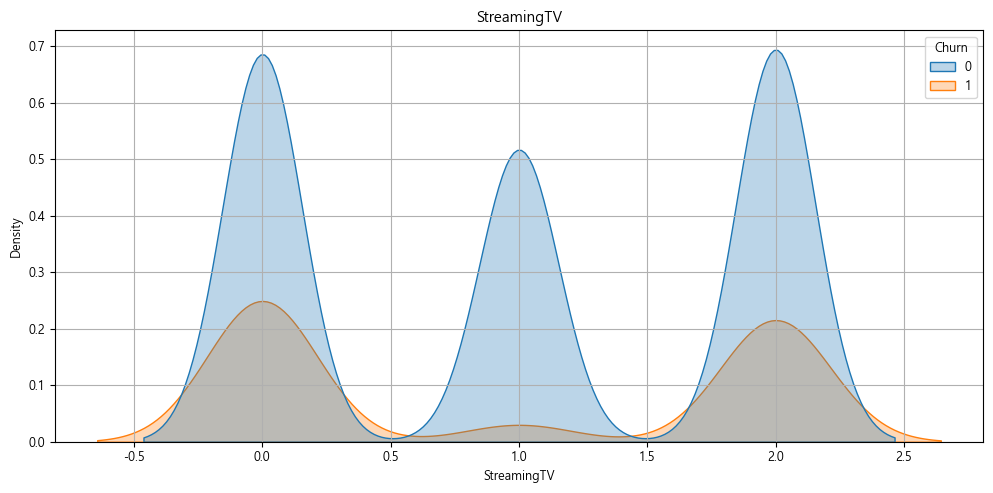

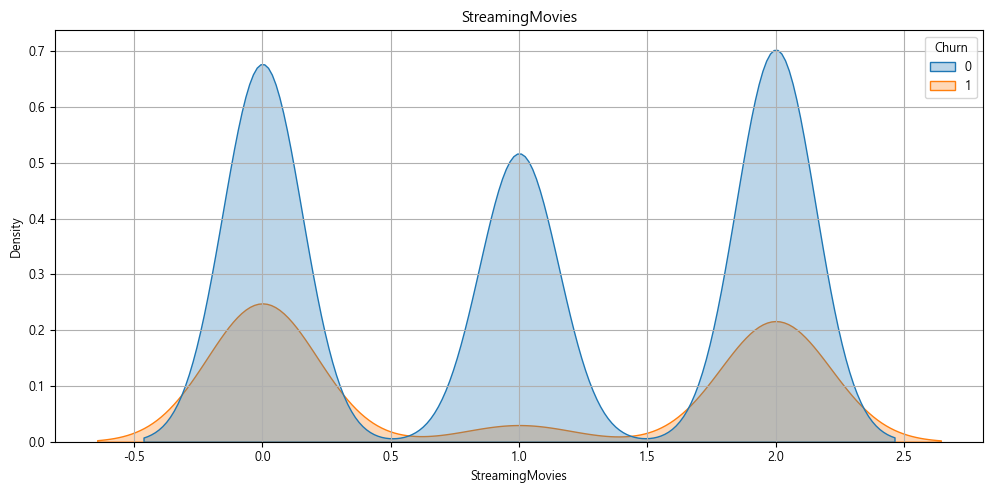

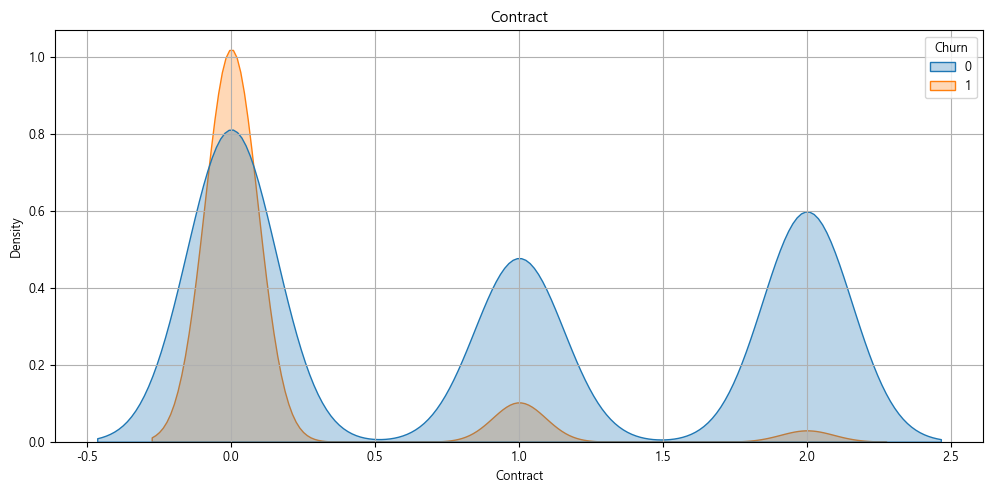

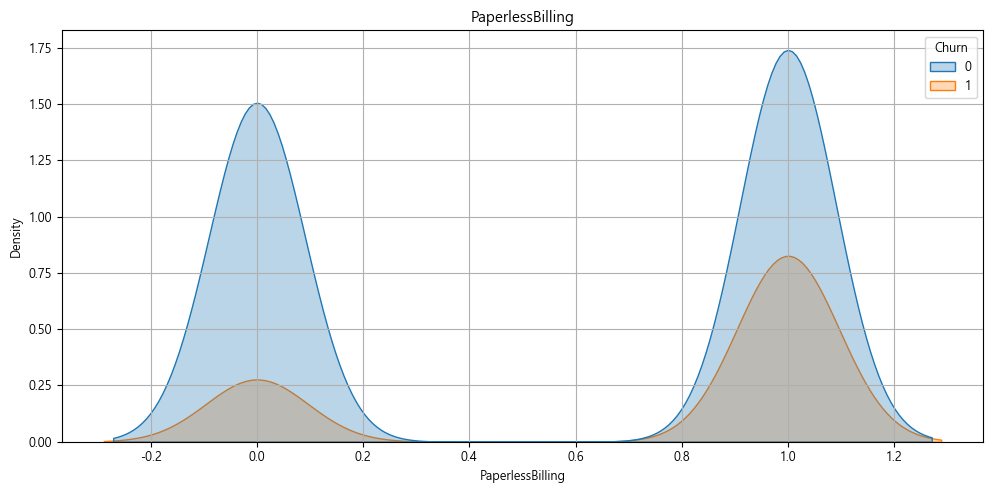

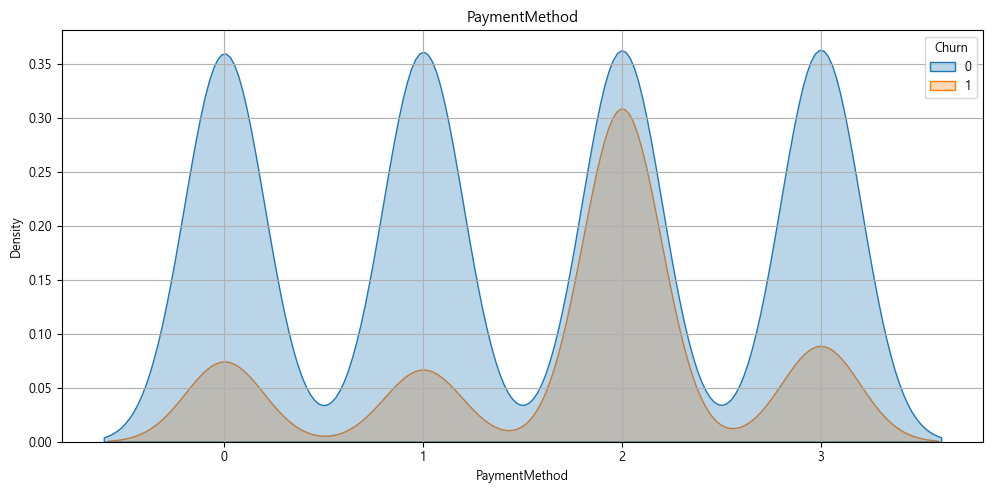

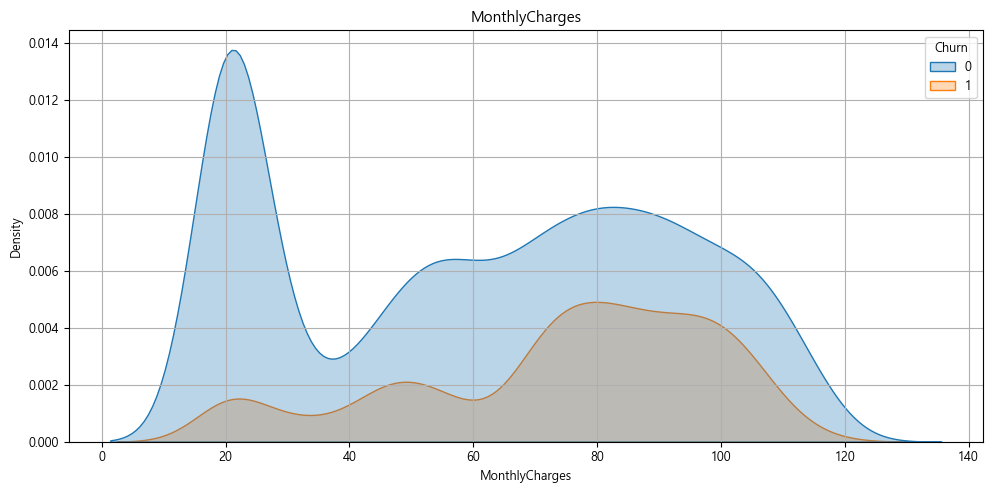

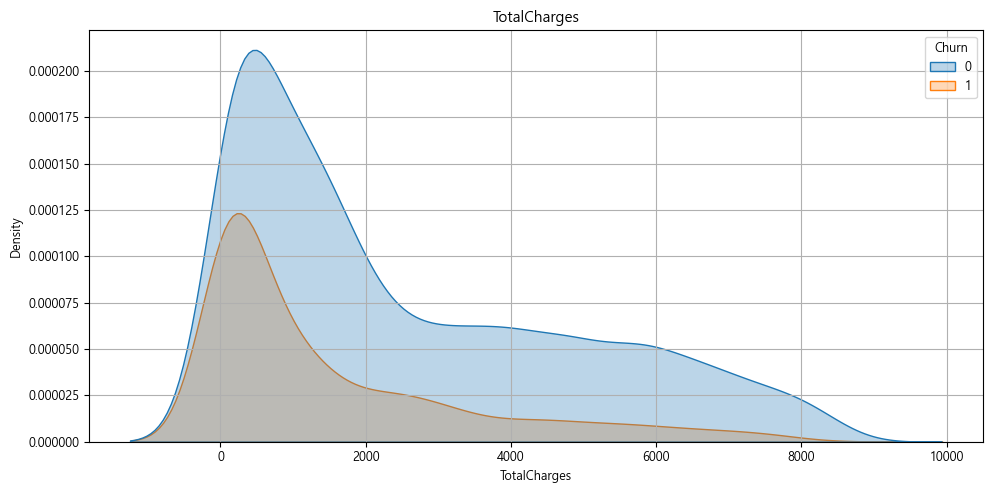

In [80]:
yname = 'Churn'
xnames = list(df2.drop(yname, axis=1).columns)
#print(xnames)
for i in xnames:
    #print(i)
    if df2[i].dtype == 'category':
        my_countplot(df2,xname=i, hue=yname,dpi=100)

    else:
        my_kdeplot(df2, xname=i, hue=yname, fill=True, dpi=100, callback=lambda ax: ax.set_title(i))

In [72]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Churn',scalling=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5625, 19), (5625,), (1407, 19), (1407,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.803556 |
| 10 |     1 | l2        |          0.803378 |
| 13 |    10 | l2        |          0.803378 |
| 16 |   100 | l2        |          0.803378 |
|  4 |  0.01 | l2        |          0.799644 |
|  1 | 0.001 | l2        |          0.772444 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.271766 |     0.305629 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.804978 |     0.808813 | 예측 결과(TN,FP,TP,TN)가 실제 결과

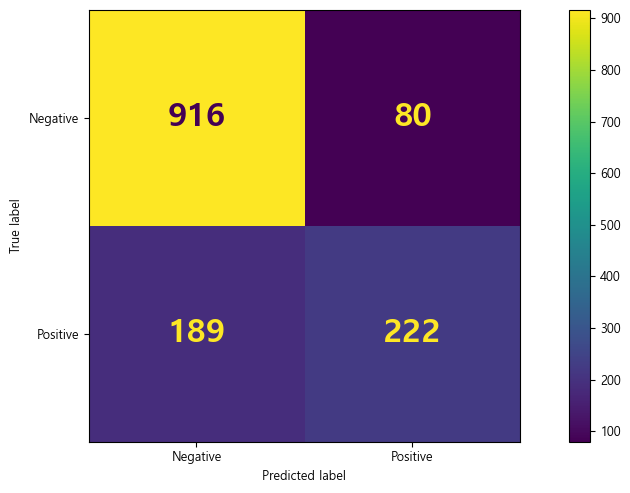


[ROC/PR Curve]


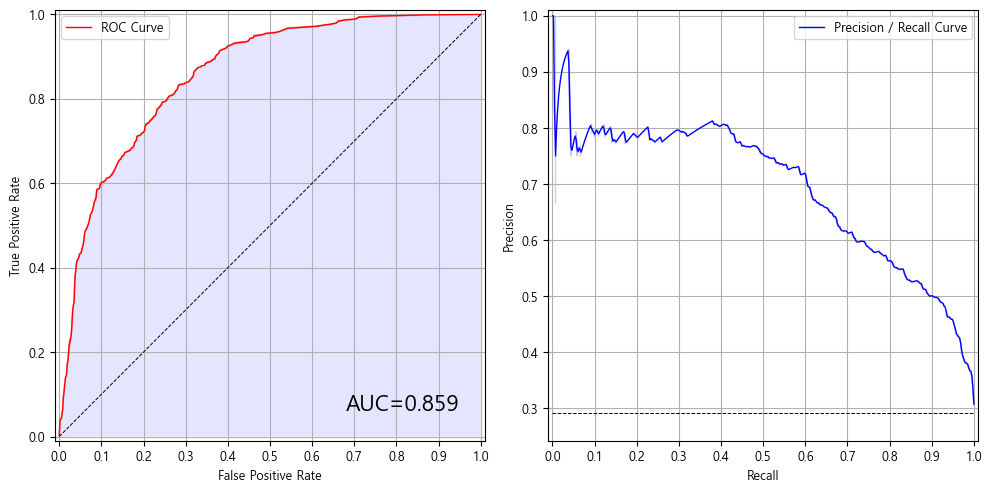


[학습곡선]


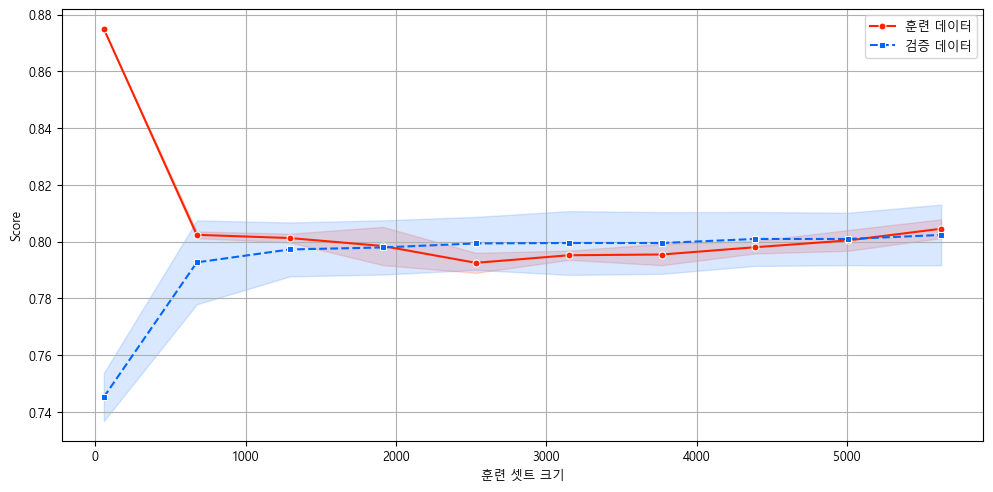

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 18 | Churn      | TotalCharges     |             0.3153 |      0.346 |  0.9125 |      0.362 | 10.6293 |     1.3707 |
|  4 | Churn      | tenure           |            -1.0465 |      0.326 | -3.2089 |      0.001 | 7.42235 |     0.3512 |
| 17 | Churn      | MonthlyCharges   |             0.7322 |      0.149 |  4.9221 |          0 | 5.13272 |     2.0797 |
| 14 | Churn      | Contract         |            -0.5798 |      0.143 |   -4.05 |          0 | 2.54988 |       0.56 |
|  7 | Churn      | InternetService  |             0.1191 |      0.109 |  1.0977 |      0.272 | 2.00185 |     1.1265 |
|  5 | Churn      | PhoneService     |            -0.2653 |      0.098

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [74]:
my_logistic_classification(x_train, y_train, x_test, y_test)

In [2]:
train_test_split

NameError: name 'train_test_split' is not defined